<a href="https://colab.research.google.com/github/JuuhhCarol/AulasIA/blob/main/Ra%C3%A7aDeGatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
from google.colab import files
uploaded = files.upload()

Saving cat_breeds.csv to cat_breeds (2).csv


In [54]:
base_gato = pd.read_csv('cat_breeds.csv', sep=';')
base_gato

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3,female,False,19,2.0,white,solid,blue,False,wet,46,16,France,43.296482,5.369780
1,Angora,0.33,4,male,False,19,2.5,white,solid,blue,False,wet,48,16,France,43.611660,3.877710
2,Angora,0.50,6,male,False,20,2.8,black,solid,green,False,wet,41,11,France,44.837789,-0.579180
3,Angora,0.50,6,female,False,21,3.0,white,solid,blue,False,wet,24,8,France,43.611660,3.877710
4,Angora,0.50,6,male,False,21,3.0,red/cream,tabby,green,False,wet,51,10,France,48.864716,2.349014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Maine coon,0.17,2,female,False,15,1.2,white,solid,blue,False,wet,35,20,UK,51.507351,-0.127758
1067,Maine coon,0.17,2,female,False,17,1.0,black,bicolor,blue,False,wet,36,19,UK,51.507351,-0.127758
1068,Maine coon,0.17,2,male,False,14,0.7,red/cream,tabby,blue,False,wet,20,20,UK,51.507351,-0.127758
1069,Maine coon,0.17,2,male,False,16,1.1,red/cream,tabby,green,False,wet,34,19,UK,52.486244,-1.890401


In [55]:
base_gato.isnull().sum()

,0
Breed,0
Age_in_years,0
Age_in_months,0
Gender,0
Neutered_or_spayed,0
Body_length,0
Weight,0
Fur_colour_dominant,0
Fur_pattern,0
Eye_colour,0


In [56]:
base_gato = base_gato.dropna(axis=1)

In [57]:
print(base_gato)

           Breed  Age_in_years  Age_in_months  Gender  Neutered_or_spayed  \
0         Angora          0.25              3  female               False   
1         Angora          0.33              4    male               False   
2         Angora          0.50              6    male               False   
3         Angora          0.50              6  female               False   
4         Angora          0.50              6    male               False   
...          ...           ...            ...     ...                 ...   
1066  Maine coon          0.17              2  female               False   
1067  Maine coon          0.17              2  female               False   
1068  Maine coon          0.17              2    male               False   
1069  Maine coon          0.17              2    male               False   
1070  Maine coon          0.17              2  female               False   

      Body_length  Weight Fur_colour_dominant Fur_pattern Eye_colour  \
0  

/tmp/ipython-input-312008217.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-312008217.py:1: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



<Axes: xlabel='Breed', ylabel='count'>

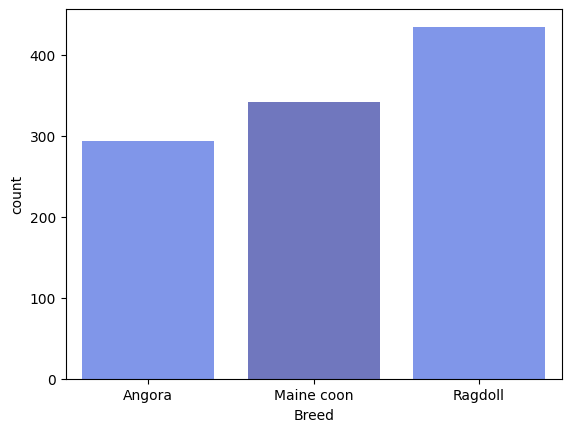

In [58]:
sns.countplot(x=base_gato['Breed'], palette=['#6E8CFB','#636CCB'] )

In [59]:
grafico = px.parallel_categories(base_gato, dimensions=['Breed','Country'])
grafico.show()

In [60]:

grafico = px.treemap(base_gato, path=['Breed','Fur_colour_dominant','Eye_colour'])
grafico.show()

<Axes: xlabel='Age_in_years', ylabel='Age_in_months'>

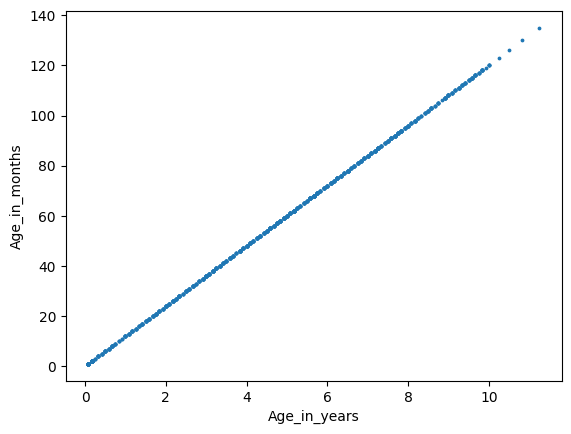

In [61]:
base_gato.plot.scatter(x='Age_in_years', y='Age_in_months', s=3 )

Esse código serve para transformar string em int, e padronizar a escala numerica:

In [65]:
target = 'Breed'
features = [
    'Age_in_years', 'Gender', 'Neutered_or_spayed',
    'Body_length', 'Weight', 'Fur_colour_dominant',
    'Fur_pattern', 'Eye_colour', 'Allowed_outdoor',
    'Preferred_food', 'Owner_play_time_minutes',
    'Sleep_time_hours', 'Country'
]
clean_base = base_gato[features]
clean_target = base_gato[target].copy()



In [66]:

from sklearn.preprocessing import LabelEncoder

features_les = {}
base_encoded = clean_base.copy()
for feat in features:
    if base_encoded[feat].dtype == 'object':
        features_les[feat] = LabelEncoder()
        base_encoded[feat] = features_les[feat].fit_transform(base_encoded[feat])

target_le = LabelEncoder()
target_encoded = clean_target.copy()
if(clean_target.dtype == 'object'):
    target_encoded = target_le.fit_transform(target_encoded)
target_encoded = pd.Series(target_encoded, name=target)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_scaled = scaler.fit_transform(base_encoded)

# Treino e teste da I.A

In [68]:
from sklearn.model_selection import train_test_split

x = base_scaled.copy()
y = target_encoded.copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

In [69]:
import pickle
with open('cat_breeds.pkl', mode = 'wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

In [71]:
with open('cat_breeds.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [70]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(base_encoded, target_encoded, test_size = 0.2, random_state = 11)

g_naivebayes = GaussianNB()
g_naivebayes.fit(x_train, y_train)

model = g_naivebayes

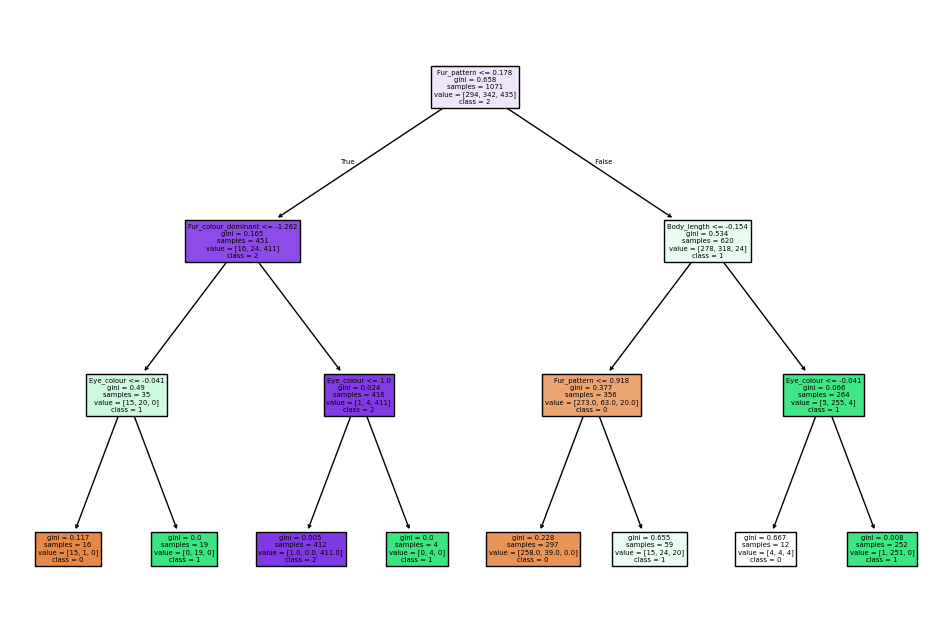

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(x, y)

model = tree


plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=features, class_names=[str(x) for x in target_encoded.unique()], filled=True)
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9162790697674419

In [74]:
from sklearn.metrics import precision_score

pred = model.predict(x_test)
precision = precision_score(y_test, pred, average='macro')
precision

0.9118634789867667

In [75]:
from sklearn.metrics import recall_score

pred = model.predict(x_test)
recall = recall_score(y_test, pred, average='macro')
recall

0.9187809266756636

In [80]:
from sklearn.metrics import f1_score

pred = model.predict(x_test)
f1 = f1_score(y_test, pred, average='macro')
f

<_io.BufferedReader name='cat_breeds.pkl'>

0.9162790697674419

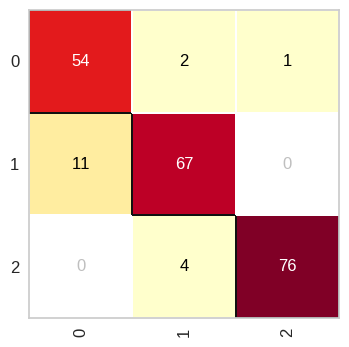

In [78]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(4,4))

pred = model.predict(x_test)
cm = ConfusionMatrix(model)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        57
           1       0.92      0.86      0.89        78
           2       0.99      0.95      0.97        80

    accuracy                           0.92       215
   macro avg       0.91      0.92      0.91       215
weighted avg       0.92      0.92      0.92       215

